# Check whether this thing is working

In [1]:
"Hello World"

'Hello World'

# DNA Framework

![](img/dna1.jpg)

![](img/dna2.jpg)

# Import libraries

In [2]:
import seaborn as sns
import matplotlib as plt
import re
import pandas as pd

# Import Dataset



In [3]:
movies = pd.read_csv('movies_metadata.csv')

C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data pre-processing

In [4]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [5]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
movies.duplicated().sum()

13

In [7]:
movies.drop_duplicates(inplace=True)

In [8]:
movies.reset_index()

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45448,45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45449,45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45450,45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45451,45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [9]:
movies.duplicated().sum()

0

In [10]:
movies['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45461          Rising and falling between a man and woman.
45462    An artist struggles to finish his work while a...
45463    When one of her hits goes wrong, a professiona...
45464    In a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45453, dtype: object

In [11]:
movies.shape

(45453, 24)

## To see that how do the NA columns look like

In [12]:
movies.isna().sum()

adult                        0
belongs_to_collection    40959
budget                       0
genres                       0
homepage                 37673
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [13]:
#Check null first
movies.loc[movies['homepage'].isnull()].head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


In [14]:
#check not null
movies.loc[movies['homepage'].notnull()].head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
24,False,NaN,3600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.mgm.com/title_title.do?title_star=L...,451,tt0113627,en,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",...,1995-10-27,49800000.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,I Love You... The Way You Are.,Leaving Las Vegas,False,7.1,365.0
46,False,NaN,33000000,"[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...",http://www.sevenmovie.com/,807,tt0114369,en,Se7en,Two homicide detectives are on a desperate hun...,...,1995-09-22,327311859.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Seven deadly sins. Seven ways to die.,Se7en,False,8.1,5915.0
49,False,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.mgm.com/#/our-titles/2083/The-Usual...,629,tt0114814,en,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin...",...,1995-07-19,23341568.0,106.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Five Criminals. One Line Up. No Coincidence.,The Usual Suspects,False,8.1,3334.0


In [15]:
# We already know that HomePage column is just a hompage of each movies
# Out objective is to recommend movies to user so, homepage isn't that neccessary
# How about drop the column?
# Yes of course that's a great idea
# but we must first create another dataFrame so, we won't end up like s*** if we f***ed up
df = movies.copy()

In [16]:
#dropping
df.drop('homepage', axis='columns', inplace=True)

In [17]:
#check if it's dropped
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [18]:
# it's gone so let's check another columns
df.isna().sum()

adult                        0
belongs_to_collection    40959
budget                       0
genres                       0
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [19]:
#the next column that we'll inspect will be belong_to_collection one
#check whether how much is it to the whole count of dataset
len(df.loc[df['belongs_to_collection'].isnull()]) * 100 / df.shape[0]

90.11286383737047

In [20]:
#it's almost 100% holy s***
#so I wonder how about another null columns?
(df.isna().sum() * 100 / df.shape[0]).round(2)

adult                     0.00
belongs_to_collection    90.11
budget                    0.00
genres                    0.00
id                        0.00
imdb_id                   0.04
original_language         0.02
original_title            0.00
overview                  2.10
popularity                0.01
poster_path               0.85
production_companies      0.01
production_countries      0.01
release_date              0.19
revenue                   0.01
runtime                   0.58
spoken_languages          0.01
status                    0.19
tagline                  55.10
title                     0.01
video                     0.01
vote_average              0.01
vote_count                0.01
dtype: float64

In [21]:
#there are two columns that're above 50%
#dropping
df.drop('belongs_to_collection', axis='columns', inplace=True)

In [22]:
df.drop('tagline', axis='columns', inplace=True)

In [23]:
#check
df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [24]:
#let's move to the next one
#overview
df.loc[df['overview'].isnull()]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
32,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",78802,tt0114952,fr,"Guillaumet, les ailes du courage",NaN,0.745542,/k6ODtR38dKEfuzSGjggr8KDyAF4.jpg,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1996-09-18,0.0,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Wings of Courage,False,6.8,4.0
300,False,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",161495,tt0114296,sv,Roommates,NaN,3.39587,/hvHNlMvWS2GBt7RR971bJ3k4bJc.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-03-01,12400000.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Roommates,False,6.4,7.0
634,False,0,"[{'id': 35, 'name': 'Comedy'}]",287305,tt0117312,de,Peanuts – Die Bank zahlt alles,NaN,0.066123,/wpk30SvRHmjC2plgKHZXxG0FlKd.jpg,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1996-03-21,0.0,NaN,[],Released,Peanuts – Die Bank zahlt alles,False,4.0,1.0
635,False,0,"[{'id': 35, 'name': 'Comedy'}]",339428,tt0116485,de,Happy Weekend,NaN,0.002229,NaN,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1996-03-14,65335.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,Happy Weekend,False,0.0,0.0
641,False,0,"[{'id': 35, 'name': 'Comedy'}]",10801,tt0117788,de,Das Superweib,NaN,0.821299,/AbhMKCh3fV5PY2B9uSPF1DWEvq2.jpg,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1996-03-06,0.0,86.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,The Superwife,False,5.3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45342,False,0,"[{'id': 18, 'name': 'Drama'}]",199887,tt1771636,en,Over/Under,NaN,0.704642,/1xLaIBGGPE4APtBJdfeuyOWICZ0.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2013-01-04,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Over/Under,False,4.0,2.0
45377,False,0,"[{'id': 12, 'name': 'Adventure'}]",317389,tt0070695,es,Simbad e il califfo di Bagdad,NaN,0.006352,/izk7KbT6LZO9baEhCkOZYMgj60w.jpg,...,"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1973-07-22,0.0,NaN,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,Simbad e il califfo di Bagdad,False,0.0,0.0
45398,False,1254040,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,tt5742932,fi,Lauri Mäntyvaaran tuuheet ripset,NaN,0.347806,/rKOpJuwb7pTqYVShHM2tl25VxyF.jpg,...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2017-07-28,0.0,90.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Thick Lashes of Lauri Mäntyvaara,False,8.0,1.0
45399,False,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,tt3805180,ru,Все и сразу,NaN,0.201582,/hNsmPpl3zLG36jr4EIEd5P8I4pa.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2014-06-05,3.0,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,All at Once,False,6.0,4.0


In [25]:
#it's neccesary to have overview, it represents as a short version of the movie
#so I decided to drop the NaN rows
df.dropna(axis='rows', inplace=True)

In [26]:
df.shape[0]

44035

In [27]:
df.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [28]:
df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0


In [29]:
#rename genres of each movies
regex = re.compile(r": '(.*?)'")
df['genres'] = df['genres'].apply(lambda x: ", ".join(regex.findall(x)))
df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation, Comedy, Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance, Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0,"Drama, Action, Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Robin Hood,False,5.7,26.0
45462,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45463,False,0,"Action, Drama, Thriller",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45464,False,0,,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [30]:
#reset index
df.reset_index(drop=True)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation, Comedy, Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance, Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44030,False,0,"Drama, Action, Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Robin Hood,False,5.7,26.0
44031,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
44032,False,0,"Action, Drama, Thriller",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
44033,False,0,,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [31]:
#rename production names and production countries
df['production_companies'] = df['production_companies'].apply(lambda x: ', '.join(regex.findall(x)))
df['production_countries'] = df['production_countries'].apply(lambda x: ', '.join(regex.findall(x)))

In [32]:
#rename spoken langs
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ', '.join(regex.findall(x)))

In [33]:
#check
df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation, Comedy, Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"US, United States of America",1995-10-30,373554033.0,81.0,"en, English",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"US, United States of America",1995-12-15,262797249.0,104.0,"en, English, fr, Français",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance, Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"US, United States of America",1995-12-22,0.0,101.0,"en, English",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"US, United States of America",1995-12-22,81452156.0,127.0,"en, English",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"US, United States of America",1995-02-10,76578911.0,106.0,"en, English",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0,"Drama, Action, Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"CA, Canada, DE, Germany, GB, United Kingdom, U...",1991-05-13,0.0,104.0,"en, English",Released,Robin Hood,False,5.7,26.0
45462,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"PH, Philippines",2011-11-17,0.0,360.0,"tl,",Released,Century of Birthing,False,9.0,3.0
45463,False,0,"Action, Drama, Thriller",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"US, United States of America",2003-08-01,0.0,90.0,"en, English",Released,Betrayal,False,3.8,6.0
45464,False,0,,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"RU, Russia",1917-10-21,0.0,87.0,,Released,Satan Triumphant,False,0.0,0.0


In [34]:
df.loc[df['genres'] == 'Science Fiction']

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
170,False,90000000,Science Fiction,9482,tt0113492,en,Judge Dredd,"In a dystopian future, Dredd, the most famous ...",8.18481,/r17S4XlQ3Jq5U1KRovFUwU8P4aG.jpg,...,"US, United States of America",1995-06-30,113493481.0,96.0,"en, English",Released,Judge Dredd,False,5.4,643.0
663,False,9000000,Science Fiction,8069,tt0062711,en,Barbarella,"In the far future, a highly sexual woman is ta...",14.3042,/fntrx2BzHkdSNFe5jkgP09XsK7g.jpg,...,"US, United States of America",1968-10-10,2500000.0,98.0,"en, English",Released,Barbarella,False,5.7,149.0
1638,False,0,Science Fiction,438108,tt0128755,en,Time Tracers,When the discovery of a five-thousand year old...,0.001247,/tU52aw3QwOV2a7zD4T659iAKGwr.jpg,...,"US, United States of America",1997-12-16,0.0,101.0,"en, English",Released,Time Tracers,False,0.0,0.0
1684,False,75000000,Science Fiction,10153,tt0120184,en,Sphere,The OSSA discovers a spacecraft thought to be ...,7.12474,/jrjzPjKnpJq99GPePKf64k7Fzqh.jpg,...,"US, United States of America",1998-02-13,13100000.0,134.0,"en, English",Released,Sphere,False,5.8,483.0
2583,False,0,Science Fiction,67067,tt0120554,en,Zone 39,In a time of misery and fear two enemies come ...,0.087065,/5VMuNPqKhc0gEH0HyVxgjUXAgs9.jpg,...,"AU, Australia",1996-05-04,0.0,95.0,"en, English",Released,Zone 39,False,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45069,False,0,Science Fiction,401427,tt5769236,en,Elegy,"In the future, nature has evolved to destroy h...",0.016472,/wcq1a3heYgd8TOuctso0c3Pk4wx.jpg,...,,2014-09-10,0.0,16.0,,Released,Elegy,False,0.0,0.0
45075,False,0,Science Fiction,314238,tt1899268,en,Plug,"On a post-apocalyptic Earth, Leila Dawn (Natal...",0.495194,/3Sa0PaFHLQWe3q60sNOXCb4RkbB.jpg,...,"US, United States of America",2014-10-25,0.0,16.0,"en, English",Released,Plug,False,5.6,5.0
45183,False,0,Science Fiction,429101,tt4881364,en,Anti Matter,Anti Matter (AKA Worm) is a sci-fi noir take o...,4.57264,/fQq24L8ioUy3cHWPo8LheguicxF.jpg,...,"GB, United Kingdom",2016-01-01,0.0,109.0,,Released,Anti Matter,False,6.7,22.0
45367,False,0,Science Fiction,449696,tt0105492,en,The Stranger: Summoned by Shadows,Wearied by his travels through time and space ...,3.5e-05,/aWnsJwOZB1ARhavpnh0O5ae8qWn.jpg,...,"GB, United Kingdom",1991-01-01,0.0,34.0,"en, English",Released,The Stranger: Summoned by Shadows,False,0.0,0.0


In [35]:
#check whether renamed columns are null or not
df.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [36]:
#Dropping rows that don't contain type
df.drop(df.loc[df['genres'] == ""].index, inplace=True)

In [37]:
df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation, Comedy, Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"US, United States of America",1995-10-30,373554033.0,81.0,"en, English",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"US, United States of America",1995-12-15,262797249.0,104.0,"en, English, fr, Français",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance, Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"US, United States of America",1995-12-22,0.0,101.0,"en, English",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"US, United States of America",1995-12-22,81452156.0,127.0,"en, English",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"US, United States of America",1995-02-10,76578911.0,106.0,"en, English",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,False,0,Horror,289923,tt0252966,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,0.38645,/lXtoHVdej6kS1Dc7KAhw05sMos9.jpg,...,"US, United States of America",2000-10-03,0.0,30.0,"en, English",Released,The Burkittsville 7,False,7.0,1.0
45459,False,0,Science Fiction,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,...,"US, United States of America",1995-01-01,0.0,85.0,"en, English",Released,Caged Heat 3000,False,3.5,1.0
45460,False,0,"Drama, Action, Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"CA, Canada, DE, Germany, GB, United Kingdom, U...",1991-05-13,0.0,104.0,"en, English",Released,Robin Hood,False,5.7,26.0
45462,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"PH, Philippines",2011-11-17,0.0,360.0,"tl,",Released,Century of Birthing,False,9.0,3.0


In [38]:
# #Change movies that have multiple genres into only one genre
# df.loc[df['genres'].str.len() > 12, 'genres'] = "MultipleType"

In [39]:
df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [40]:
# mapping adult movies
df['adult'] = df['adult'].astype('string')
df['adult'] = df['adult'].map({"True" : "Adult", "False":"Non-Adult"})

In [41]:
df['title'] = df['title'].drop_duplicates()

In [42]:
df.drop(df.loc[df['original_language'] != 'en'].index, inplace=True)

In [43]:
df.shape[0]

30329

In [44]:
df.drop(df.loc[df['title'].isnull()].index, inplace=True)

In [45]:
df.reset_index()


,index,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,0,Non-Adult,30000000,"Animation, Comedy, Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,"US, United States of America",1995-10-30,373554033.0,81.0,"en, English",Released,Toy Story,False,7.7,5415.0
1,1,Non-Adult,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,"US, United States of America",1995-12-15,262797249.0,104.0,"en, English, fr, Français",Released,Jumanji,False,6.9,2413.0
2,2,Non-Adult,0,"Romance, Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,"US, United States of America",1995-12-22,0.0,101.0,"en, English",Released,Grumpier Old Men,False,6.5,92.0
3,3,Non-Adult,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,"US, United States of America",1995-12-22,81452156.0,127.0,"en, English",Released,Waiting to Exhale,False,6.1,34.0
4,4,Non-Adult,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,...,"US, United States of America",1995-02-10,76578911.0,106.0,"en, English",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28288,45452,Non-Adult,0,Documentary,276895,tt3054038,en,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",0.011025,...,"US, United States of America",1981-01-01,0.0,58.0,"ff, Fulfulde, en, English",Released,Deep Hearts,False,0.0,0.0
28289,45456,Non-Adult,0,"Horror, Mystery, Thriller",84419,tt0038621,en,House of Horrors,An unsuccessful sculptor saves a madman named ...,0.222814,...,"US, United States of America",1946-03-29,0.0,65.0,"en, English",Released,House of Horrors,False,6.3,8.0
28290,45457,Non-Adult,0,"Mystery, Horror",390959,tt0265736,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",0.076061,...,,2000-10-22,0.0,45.0,"en, English",Released,Shadow of the Blair Witch,False,7.0,2.0
28291,45458,Non-Adult,0,Horror,289923,tt0252966,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,0.38645,...,"US, United States of America",2000-10-03,0.0,30.0,"en, English",Released,The Burkittsville 7,False,7.0,1.0


In [46]:
df_eda = df.copy()

In [47]:
df['runtime'] = pd.cut(df['runtime'], bins=5, labels=['Short', 'Short-Medium', 'Medium', "Medium-Long", 'Long'])

In [48]:
df['popularity'] = df['popularity'].astype('float64')

In [49]:
df['popularity'] = pd.cut(df['popularity'], bins=3, labels=['Low', 'Medium', 'High'])

In [50]:
df['vote_average'] = pd.cut(df['vote_average'], bins=3, labels=['Low', 'Medium', 'High'])
df['vote_count'] = pd.cut(df['vote_count'], bins=3, labels=['Low', "Medium", 'High'])

In [51]:
df.reset_index(inplace=True)

# EDA

In [52]:
df_eda['vote_average'] = df_eda['vote_average'].astype('int')

In [53]:
###Visualization
import matplotlib.pyplot as plt

#selecting jumanji movie to compare which movies are similar?
similar_jumanji = df_eda.loc[df_eda['title'] == 'Jumanji']
s = similar_jumanji['genres'][1].split(', ')
print(s)


['Adventure', 'Fantasy', 'Family']


Text(0, 0.5, 'Vote Average')

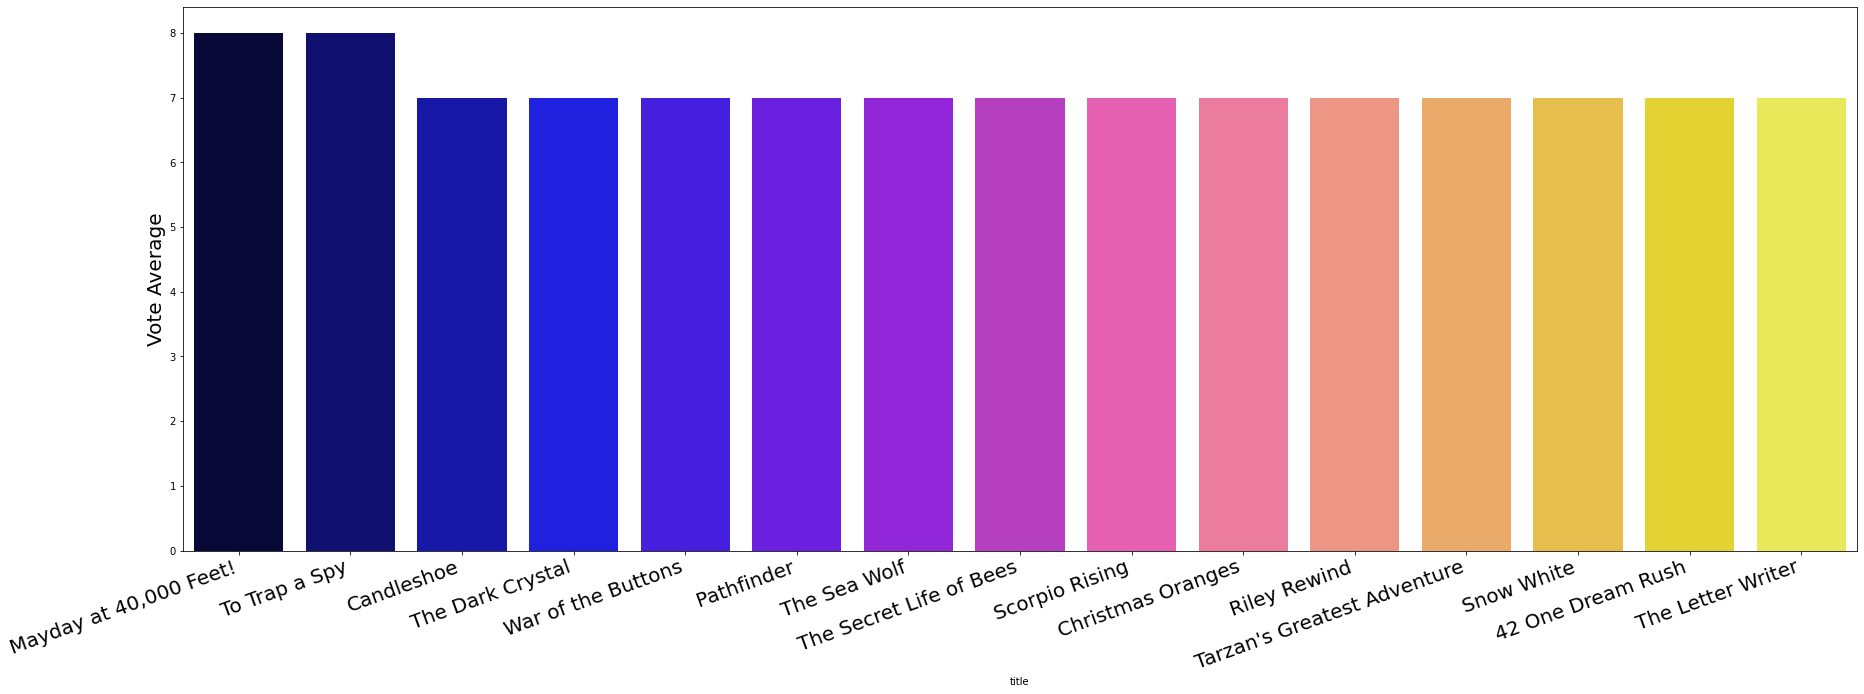

In [54]:
similarMovie = df_eda.loc[(df_eda['genres'] == s[0]) | (df_eda['genres'] == s[1]) | (df_eda['genres'] == s[2])]
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=similarMovie.nlargest(15,'vote_average'), x='title', y='vote_average', palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=20, ha="right")
ax.set_ylabel('Vote Average', fontsize=20)

In [55]:
#count amount of total genres
def countgenre(data, runtime):
  dicts = {}
  runtimeDict = {}
  i = 0
  for x in data:
    for y in x:
      if y not in dicts.keys():
        dicts[y] = 0
        runtimeDict[y] = 0
      dicts[y] = int(dicts[y])+1
      runtimeDict[y] = int(runtimeDict[y])+runtime[i]
    i += 1
  return dicts, runtimeDict

In [56]:
GENRE = df_eda['genres'].str.split(", ")
RUNTIME = df_eda['runtime'].values
GENRES, RUNTIMES = countgenre(GENRE, RUNTIME)
GENRES


{'Animation': 1180,
 'Comedy': 8854,
 'Family': 2131,
 'Adventure': 2460,
 'Fantasy': 1468,
 'Romance': 4450,
 'Drama': 12109,
 'Action': 4364,
 'Crime': 2895,
 'Thriller': 5391,
 'Horror': 3425,
 'History': 820,
 'Science Fiction': 2258,
 'Mystery': 1761,
 'War': 845,
 'Music': 1313,
 'Documentary': 3177,
 'Foreign': 623,
 'Western': 794,
 'TV Movie': 624}

In [57]:
colGenre = pd.DataFrame(data=GENRES.keys(),columns=['genres'])
rowGenre = pd.DataFrame(data=GENRES.values(),columns=['count_genre'])
runtimeCol = pd.DataFrame(data=RUNTIMES.values(),columns=['runtime_genres'])
colGenre.reset_index(inplace=True)
rowGenre.reset_index(inplace=True)
Genre = pd.merge(colGenre,rowGenre,on=['index','index'])
Genre
# create count genres dataframe for checking value count each genres

,index,genres,count_genre
0,0,Animation,1180
1,1,Comedy,8854
2,2,Family,2131
3,3,Adventure,2460
4,4,Fantasy,1468
5,5,Romance,4450
6,6,Drama,12109
7,7,Action,4364
8,8,Crime,2895
9,9,Thriller,5391


In [58]:
# runtimeGenre = list()
# for i in range(len(Genre['count_genre'])):
#     runtimeGenre.append(runtimeCol['runtime_genres'][i]//Genre['count_genre'][i])
# print(runtimeGenre)
# Genre['runtime_genres'] = runtimeGenre
# Genre

Text(0, 0.5, 'Count Genres')

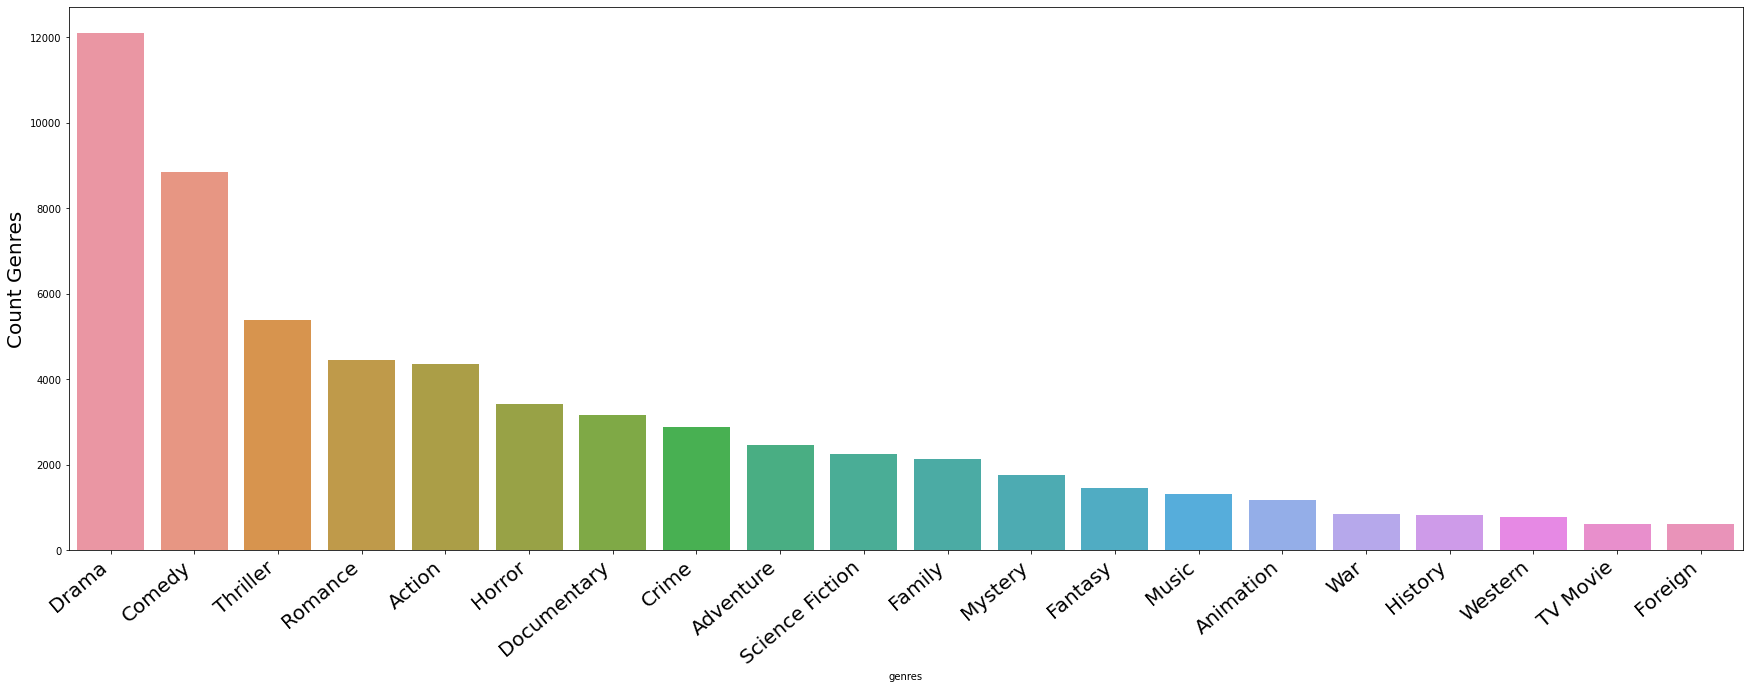

In [59]:
### mostly movies genre
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=Genre.nlargest(32,'count_genre'), x='genres', y='count_genre' )
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=40, ha="right")
ax.set_ylabel('Count Genres', fontsize=20)

C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

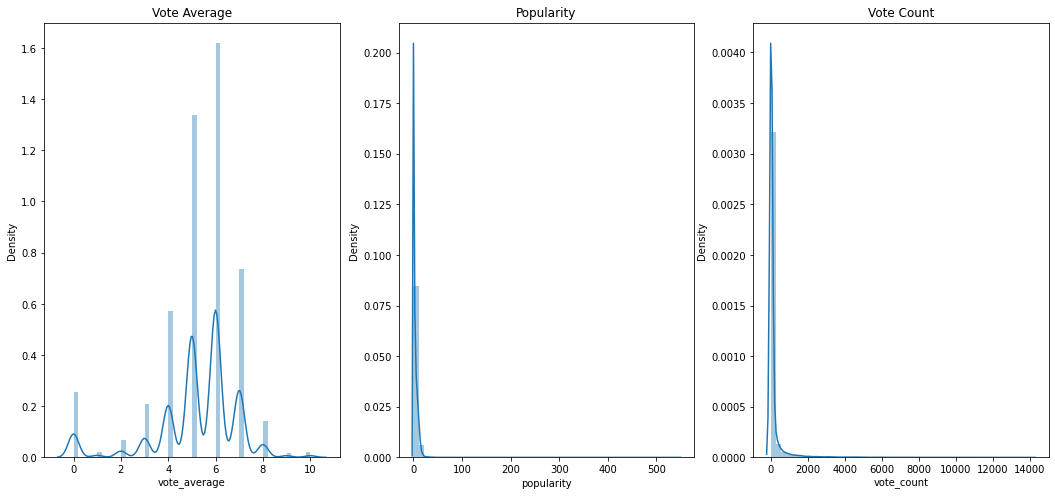

In [60]:
#check the voting, popularity period
f,ax=plt.subplots(1,3,figsize=(18,8))
sns.distplot(df_eda['vote_average'],ax=ax[0])
ax[0].set_title('Vote Average')

sns.distplot(df_eda['popularity'],ax=ax[1])
ax[1].set_title('Popularity')

sns.distplot(df_eda['vote_count'],ax=ax[2])
ax[2].set_title('Vote Count')
plt.show()


C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Runtime')

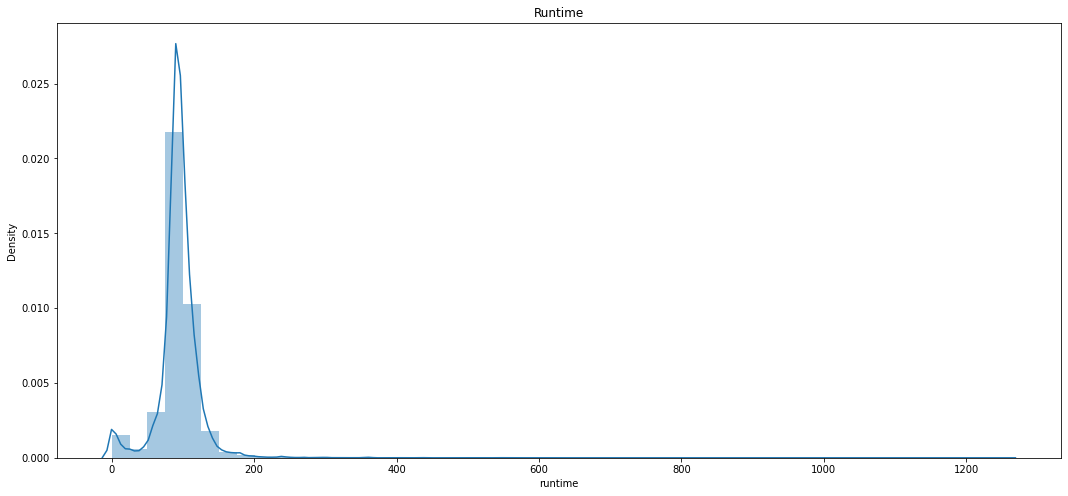

In [61]:
# Checking whether where are mostly movies runtime
f,ax=plt.subplots(figsize=(18,8))
ax = sns.distplot(df_eda['runtime'])
ax.set_title('Runtime')

In [62]:
columnRun = ['count_genres', 'runtime_genres']

In [63]:
#duration
df_eda['runtime'].quantile([1.,.75,.5,.25])


1.00    1256.0
0.75     105.0
0.50      94.0
0.25      85.0
Name: runtime, dtype: float64

In [64]:
df_eda['runtime'].quantile(.5)


94.0

In [65]:
df_eda['runtime'].quantile(.99)


180.0

In [66]:
df_eda['runtime'].quantile(.9)

119.79999999999927

<AxesSubplot:xlabel='runtime', ylabel='Count'>

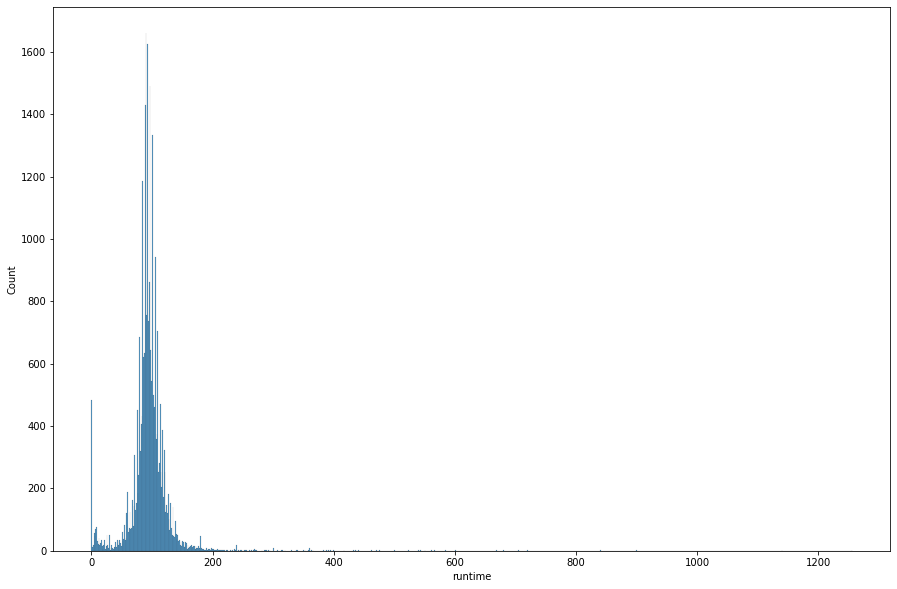

In [67]:
plt.figure(figsize=(15,10))
sns.histplot(df_eda['runtime'])

In [68]:
listGenre = []
listRuntime = []
for genre, run in zip(df_eda['genres'].str.split(', '), df_eda['runtime']):
    listGenre = listGenre+genre
    listRuntime = listRuntime+[run for i in range(len(genre))]



In [69]:
new_runtime_genre = pd.DataFrame({
    'genres': listGenre,
    'runtime': listRuntime
})

In [70]:
new_runtime_genre

,genres,runtime
0,Animation,81.0
1,Comedy,81.0
2,Family,81.0
3,Adventure,104.0
4,Fantasy,104.0
...,...,...
60937,Thriller,65.0
60938,Mystery,45.0
60939,Horror,45.0
60940,Horror,30.0


<AxesSubplot:xlabel='genres', ylabel='runtime'>

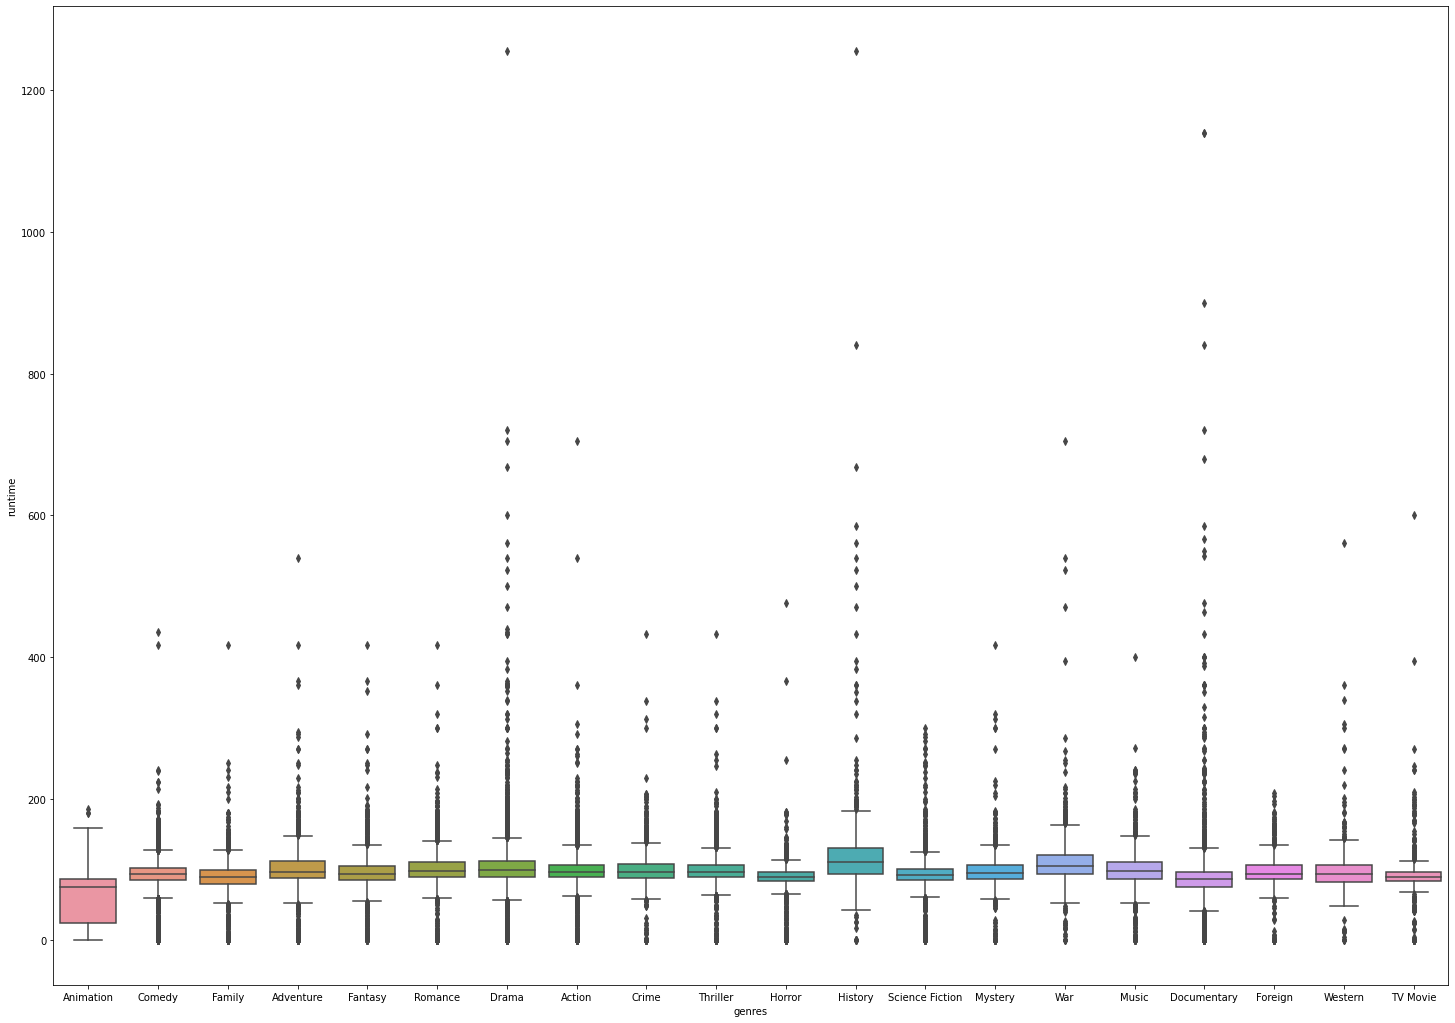

In [71]:
plt.figure(figsize=(25,18))
sns.boxplot(x='genres', y='runtime', data=new_runtime_genre)

In [72]:
data_task = df_eda.original_language.value_counts().head(20)
data_task = pd.DataFrame({"Language" : data_task.index, "Count" : data_task}).reset_index(drop = True)
data_task

,Language,Count
0,en,28293


In [73]:
# #check other languages without eng
# plt.figure(figsize = (20, 10))
# plt.title("Number of movies in languages other than english", fontsize = 27, fontweight = 'bold')

# sns.barplot(x = data_task.loc[(data_task.Language != 'en'), 'Language'] ,
#             y = data_task.loc[(data_task.Language != 'en'), 'Count'],
#            palette = sns.color_palette("BuGn_r", 25))

# plt.xlabel('Language', fontsize = 20)
# plt.ylabel('Number Of Movies', fontsize = 20)
# plt.xticks(fontsize = 17)
# plt.yticks(fontsize = 13)

In [74]:
#create new dataframe for checking whether how many adult in column adult
check_adult = df.adult.value_counts()
adult_df = pd.DataFrame({"adult" : check_adult.index, "adult_count" : check_adult}).reset_index(drop = True)
adult_df

,adult,adult_count
0,Non-Adult,28289
1,Adult,4


In [75]:
# adult_df['adult'] = adult_df['adult'].apply(lambda x: 'teenager' if x == 'False' else 'Adult')
adult_df

,adult,adult_count
0,Non-Adult,28289
1,Adult,4


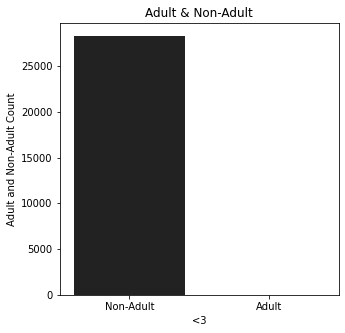

In [76]:
plt.figure(figsize = (5, 5))
sns.barplot(data=adult_df, x='adult', y='adult_count',color="#222")
plt.ylabel("Adult and Non-Adult Count")
plt.xlabel("<3")
plt.title("Adult & Non-Adult");

# Feature Engineering
## What feature should I decide to give the model to train itself to be predicting a similarity movie?
    1. Genre
    2. Overview
    4. imdb score

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

## Drop unnecessary columns

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 28293 non-null  int64   
 1   adult                 28293 non-null  object  
 2   budget                28293 non-null  object  
 3   genres                28293 non-null  object  
 4   id                    28293 non-null  object  
 5   imdb_id               28293 non-null  object  
 6   original_language     28293 non-null  object  
 7   original_title        28293 non-null  object  
 8   overview              28293 non-null  object  
 9   popularity            28293 non-null  category
 10  poster_path           28293 non-null  object  
 11  production_companies  28293 non-null  object  
 12  production_countries  28293 non-null  object  
 13  release_date          28293 non-null  object  
 14  revenue               28293 non-null  float64 
 15  ru

### Combining features

In [79]:
df.drop(columns=['imdb_id', 'id', 'poster_path', 'production_countries', 'revenue', 'release_date', 'status', 'title', 'video', 'budget'], axis=1)

,index,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,spoken_languages,vote_average,vote_count
0,0,Non-Adult,"Animation, Comedy, Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Low,Pixar Animation Studios,Short,"en, English",High,Medium
1,1,Non-Adult,"Adventure, Fantasy, Family",en,Jumanji,When siblings Judy and Peter discover an encha...,Low,"TriStar Pictures, Teitler Film, Interscope Com...",Short,"en, English, fr, Français",High,Low
2,2,Non-Adult,"Romance, Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,Low,"Warner Bros., Lancaster Gate",Short,"en, English",Medium,Low
3,3,Non-Adult,"Comedy, Drama, Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Low,Twentieth Century Fox Film Corporation,Short,"en, English",Medium,Low
4,4,Non-Adult,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,Low,"Sandollar Productions, Touchstone Pictures",Short,"en, English",Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
28288,45452,Non-Adult,Documentary,en,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",Low,,Short,"ff, Fulfulde, en, English",Low,Low
28289,45456,Non-Adult,"Horror, Mystery, Thriller",en,House of Horrors,An unsuccessful sculptor saves a madman named ...,Low,Universal Pictures,Short,"en, English",Medium,Low
28290,45457,Non-Adult,"Mystery, Horror",en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",Low,,Short,"en, English",High,Low
28291,45458,Non-Adult,Horror,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,Low,"Neptune Salad Entertainment, Pirie Productions",Short,"en, English",High,Low


In [80]:
df.shape[0]

28293

In [81]:
def combining_features(row):
    return row['genres'] + " " + row['original_title'] + " " + row['production_companies'] + " " + row['original_language'] + " " + row['runtime'] + " " + row['overview'] + " " + row['popularity'] + " " + row['vote_average'] + ' ' + row['vote_count']

In [82]:
df['combining_features'] = df.apply(combining_features, axis=1)

# Modeling
## Decide by time it spends to train
    We have got 4 choices which are 
        1. CountVectorizer with linear_kernel
        2. CountVectorizer with Cosine_similarity
        3. TfidfVectorizer with linear_kernel
        4. TfidfVectorizer with cosine_similarity

## Dummy data to evaluate model

In [83]:
dummy_data = 'Jumanji'

In [84]:
def get_index(title):
    return df.loc[df['title'] == title].index.values[0]

In [85]:
dummy_index = get_index(dummy_data)
dummy_index

1

### CountVectorizer with Linear_Kernel

In [86]:
vector = CountVectorizer().fit_transform(df['combining_features'])

In [87]:
def get_title(index):
    return df.loc[df.index == index]['title'].values[0]

In [88]:
item_similarity = linear_kernel(vector)
item_similarity = list(enumerate(item_similarity[dummy_index]))

In [89]:
sorted_similar_movies = sorted(item_similarity, key=lambda x: x[1], reverse=True)
for j in range(5):
    print(get_title(item_similarity[j][0]), sorted_similar_movies[j][1], df.loc[df.index == sorted_similar_movies[j][0]]['genres'].values[0])


Toy Story 134.0 Documentary
Jumanji 112.0 Action, Drama, Adventure
Grumpier Old Men 112.0 Fantasy, Adventure
Waiting to Exhale 112.0 Drama
Father of the Bride Part II 110.0 Action, Western


### CountVectorizer With Cosine_Similarity

In [90]:
item_similarity = cosine_similarity(vector)

In [91]:
# vector = CountVectorizer().fit_transform(df['genres'])
item_similarity = list(enumerate(item_similarity[dummy_index]))
sorted_similar_movies = sorted(item_similarity, key=lambda x:x[1], reverse=True)
for j in range(5):
    print(get_title(index=sorted_similar_movies[j][0]), sorted_similar_movies[j][1], df.loc[df.index == sorted_similar_movies[j][0]]['genres'].values[0])

Jumanji 0.9999999999999998 Adventure, Fantasy, Family
Table No. 21 0.5025179318637896 Adventure, Thriller
The Long and the Short and the Tall 0.4615207878331792 War, Drama
Are You Scared 2 0.4562696793638886 Action, Adventure, Horror
Stay Alive 0.4528302544779953 Horror, Thriller


### TfidfVectorizer with Linear_Kernel

In [92]:
vector = TfidfVectorizer(stop_words='english').fit_transform(df['combining_features'])

In [93]:
item_similarity = linear_kernel(vector)

In [94]:
item_similarity = list(enumerate(item_similarity[dummy_index]))
sorted_similar_movies = sorted(item_similarity, key=lambda x:x[1], reverse=True)
for j in range(5):
    print(get_title(index=sorted_similar_movies[j][0]), sorted_similar_movies[j][1], df.loc[df.index == sorted_similar_movies[j][0]]['genres'].values[0])

Jumanji 0.9999999999999999 Adventure, Fantasy, Family
Table No. 21 0.2009302305256122 Adventure, Thriller
Big Game 0.16483847895372392 Action, Drama, Thriller
Snowed Under 0.16441742851836966 Comedy
The Mend 0.16285972721039604 Comedy


### TfidfVectorizer with Cosine_similarity

In [95]:
# vector = TfidfVectorizer(stop_words='english').fit_transform(df['genres'])
item_similarity = cosine_similarity(vector)

In [96]:
item_similarity = list(enumerate(item_similarity[dummy_index]))
sorted_similar_movies = sorted(item_similarity, key=lambda x:x[1], reverse=True)
for j in range(5):
    print(get_title(index=sorted_similar_movies[j][0]), sorted_similar_movies[j][1], df.loc[df.index == sorted_similar_movies[j][0]]['genres'].values[0])

Jumanji 1.0000000000000002 Adventure, Fantasy, Family
Table No. 21 0.20093023052561224 Adventure, Thriller
Big Game 0.16483847895372394 Action, Drama, Thriller
Snowed Under 0.1644174285183697 Comedy
The Mend 0.16285972721039613 Comedy


### Summary

#### CountVectorizer with linear_kernel algorithm
The pair of features_engineering algorithm "CountVectorizer" and the "linear_kernel" item similarity scoring,
it results as with weird scores of each movies
so we decided to check whether each movie has the similar type(s) to dummy data ('Jumanji')
and here is the result :
![](img/cl.png)
As you can see that there is only one movie that has the similar genres to Jumanji. 
So, we decided to cut this pair out from benchmark algorithms

#### CountVectorizer with cosine_similarity algorithm
The pair of features_engineering algorithm "CountVectorizer" and the "cosine_similarity" item similarity scoring,
it results with mid range (0.4-0.6) scores of each movies which are the highest scores.
so we decided to check whether each movie has the similar type(s) to dummy data ('Jumanji')
and here is the result :
![](img/cc.png)
As you can see that there are four movies that has the similar genres to Jumanji. 
This algorithm takes 32.4 seconds to scoring movies similarity scores

#### TfidfVectorizer with Linear_kernel algorithm
The pair of features_engineering algorithm "TfidfVectorizer" and the "linear_kernel" item similarity scoring,
it results with low range (0.1-0.3) scores of each movies
so we decided to check whether each movie has the similar type(s) to dummy data ('Jumanji')
and here is the result :
![](img/tl.png)
As you can see that there no movie that has the similar genres to Jumanji (if we don't take comedy movies). 
So we decided to cut this out from benchmark list of algorithms

#### TfidfVectorizer with cosine_similarity algorithm
The pair of features_engineering algorithm "TfidfVectorizer" and the "linear_kernel" item similarity scoring,
it results with low range (0.1-0.3) scores of each movies
so we decided to check whether each movie has the similar type(s) to dummy data ('Jumanji')
and here is the result :
![](img/tc.png)
As you can see that there no movie that has the similar genres to Jumanji (if we don't take comedy movies). 
So we decided to cut this out from benchmark list of algorithms

#### Selected Algorithm
So as the benchmark results say
    - CountVectorizer with Linear_kernel results with one similar movies and mid range scores 
    - CountVectorizer with cosine_similarity results with four similar movies and mid range scores
    - TfidfVectorizer with linear_kernel results with no similar movies and low range scores
    - TfidfVectorizer with cosine_similarity results with no similar movies and low range scores

According to the result, there's only a pair of algorithms that has the results as developer expected, it is
##### CountVectorizer with cosine_similarity
![](img/cc.png)

## Show similar movies

In [97]:
model = CountVectorizer()
vector = model.fit_transform(df['combining_features'])

In [98]:
item_similarity = cosine_similarity(vector)

In [99]:
# Generating similar movies to dummy
# movies_dummy = Jumanji
# dummy_index = 1 (Index finding method is located above)
similar_movies = list(enumerate(item_similarity[dummy_index]))

In [100]:
# sorting 
sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)

In [101]:
sorted_similar_movies

[(1, 0.9999999999999998),
 (15513, 0.5025179318637896),
 (19592, 0.4615207878331792),
 (15636, 0.4562696793638886),
 (8609, 0.4528302544779953),
 (26933, 0.45257672646190283),
 (25477, 0.4491892092459308),
 (4007, 0.44815553696167215),
 (20775, 0.44663977156854656),
 (16989, 0.44546531073958673),
 (20788, 0.43894179900371916),
 (27512, 0.43802345320871156),
 (14764, 0.43652689441462095),
 (18811, 0.436048123806204),
 (27874, 0.4352715018511957),
 (24777, 0.4346171437932937),
 (6106, 0.43435761139295703),
 (7354, 0.43415067643161986),
 (14346, 0.43413616982292197),
 (5242, 0.43355993681812804),
 (7676, 0.4331173867256721),
 (5961, 0.43278548513654835),
 (18557, 0.4327854851365483),
 (27384, 0.432465067807994),
 (7761, 0.43215831821628803),
 (6080, 0.4317266329702461),
 (23577, 0.43094251957594687),
 (16524, 0.430649461299107),
 (26445, 0.42959442612671084),
 (26397, 0.4288095277183998),
 (750, 0.42842579095970945),
 (18792, 0.4283633336678899),
 (14325, 0.4282353975843285),
 (20435, 0.4

In [102]:
# it returns an array of index of movies and its score
# so we have to find what is the index represents the title of the movie
similar_movies_arr = []
score = []
def get_title(index):
    return df.loc[df.index == index]['title'].values[0]
for j in range(1, 6):
    similar_movies_arr.append(get_title(sorted_similar_movies[j][0]))
    score.append(sorted_similar_movies[j][1])


In [103]:
similar_movies_arr

['Table No. 21',
 'The Long and the Short and the Tall',
 'Are You Scared 2',
 'Stay Alive',
 'Make-Out with Violence']

In [104]:
score

[0.5025179318637896,
 0.4615207878331792,
 0.4562696793638886,
 0.4528302544779953,
 0.45257672646190283]

In [105]:
for j in range(len(similar_movies_arr)):
    print(f'Movie name = {similar_movies_arr[j]} | Matching score = {(score[j])}')

Movie name = Table No. 21 | Matching score = 0.5025179318637896
Movie name = The Long and the Short and the Tall | Matching score = 0.4615207878331792
Movie name = Are You Scared 2 | Matching score = 0.4562696793638886
Movie name = Stay Alive | Matching score = 0.4528302544779953
Movie name = Make-Out with Violence | Matching score = 0.45257672646190283


# Pipeline
## Pre-Processing
    - Remove rows which are null
    - Remove rows which are duplicated
    - Correcting genres (into string form)
    - Mapping genres

In [106]:
movies_pipe_line = pd.read_csv('movies_metadata.csv')


C:\Users\MagicPC\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [107]:
class PipeLine:
    def __init__(self, data):
        self.df = data.copy()
    def executeDataPrep(self):
        # drop columns
        self.df = self.df.drop(columns=['tagline', 'belongs_to_collection', 'homepage', 'imdb_id', 'id', 'poster_path', 'production_countries', 'revenue', 'release_date', 'status', 'title', 'video', 'budget'], axis=1)
        
        # drop null rows
        self.df.dropna(axis=0, inplace=True)

        # drop duplicated rows
        self.df.drop_duplicates(inplace=True)

        #drop none genres movies
        self.df.drop(self.df.loc[self.df['genres'] == '[]'].index, inplace=True)

        #correcting form of group columns
        regex = re.compile(r": '(.*?)'")
        self.df['genres'] = self.df['genres'].apply(lambda x: ",".join(regex.findall(x)))
        self.df['production_companies'] = self.df['production_companies'].apply(lambda x: ",".join(regex.findall(x)))
        self.df['spoken_languages'] = self.df['spoken_languages'].apply(lambda x: ",".join(regex.findall(x)))

        #grouping data
        self.df['runtime'] = pd.cut(self.df['runtime'], bins=5, labels=['Short', 'Med-Short', 'Med', "Med-Long", 'Long'])
        self.df['popularity'] = self.df['popularity'].astype('float64')
        self.df['popularity'] = pd.cut(self.df['popularity'], bins=3, labels=['Low', 'Medium', 'High'])
        self.df['vote_average'] = pd.cut(self.df['vote_average'], bins=3, labels=['Low', 'Medium', 'High'])
        self.df['vote_count'] = pd.cut(self.df['vote_count'], bins=3, labels=['Low', 'Medium', 'High'])

        #drop non-en languages
        self.df.drop(self.df.loc[self.df['original_language'] != 'en'].index, inplace=True)

        #reset indexes
        self.df = self.df.reset_index(drop=True)

        #mapping adult column
        self.df['adult'] = self.df['adult'].astype('string')
        self.df['adult'] = self.df['adult'].map({
            'False' : 'Non-Adult',
            'True' : 'Adult'
        })
        #combining_features
    def combined_features(self, row):
        return row['genres'] + " " + row['original_title'] + " " + row['production_companies'] + " " + row['original_language'] + " " + row['runtime'] + " " + row['overview'] + " " + row['popularity'] + " " + row['vote_average'] + ' ' + row['vote_count']
    def executeCombiningFeatures(self):
        self.df['combined_features'] = self.df.apply(self.combined_features, axis=1)
    def executeFeatureExtracting(self):
        model = CountVectorizer()
        vector = model.fit_transform(self.df['combined_features'])
        return vector
    # def executeCS(self, vector):
    #     itemSimilarity = cosine_similarity(vector)
    #     return itemSimilarity
    def mainExecute(self):
        self.executeDataPrep()
        self.executeCombiningFeatures()
        vector = self.executeFeatureExtracting()
        # itemSimilarity = self.executeCS(vector)
        return vector

In [108]:
pipe = PipeLine(movies_pipe_line)
vector = pipe.mainExecute()
pipe.df

,adult,genres,original_language,original_title,overview,popularity,production_companies,runtime,spoken_languages,vote_average,vote_count,combined_features
0,Non-Adult,"Animation,Comedy,Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Low,Pixar Animation Studios,Short,"en,English",High,Medium,"Animation,Comedy,Family Toy Story Pixar Animat..."
1,Non-Adult,"Adventure,Fantasy,Family",en,Jumanji,When siblings Judy and Peter discover an encha...,Low,"TriStar Pictures,Teitler Film,Interscope Commu...",Short,"en,English,fr,Français",High,Low,"Adventure,Fantasy,Family Jumanji TriStar Pictu..."
2,Non-Adult,"Romance,Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,Low,"Warner Bros.,Lancaster Gate",Short,"en,English",Medium,Low,"Romance,Comedy Grumpier Old Men Warner Bros.,L..."
3,Non-Adult,"Comedy,Drama,Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Low,Twentieth Century Fox Film Corporation,Short,"en,English",Medium,Low,"Comedy,Drama,Romance Waiting to Exhale Twentie..."
4,Non-Adult,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,Low,"Sandollar Productions,Touchstone Pictures",Short,"en,English",Medium,Low,Comedy Father of the Bride Part II Sandollar P...
...,...,...,...,...,...,...,...,...,...,...,...,...
30522,Non-Adult,"Mystery,Horror",en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",Low,,Short,"en,English",High,Low,"Mystery,Horror Shadow of the Blair Witch en S..."
30523,Non-Adult,Horror,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,Low,"Neptune Salad Entertainment,Pirie Productions",Short,"en,English",High,Low,Horror The Burkittsville 7 Neptune Salad Enter...
30524,Non-Adult,Science Fiction,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,Low,Concorde-New Horizons,Short,"en,English",Medium,Low,Science Fiction Caged Heat 3000 Concorde-New H...
30525,Non-Adult,"Drama,Action,Romance",en,Robin Hood,"Yet another version of the classic epic, with ...",Low,"Westdeutscher Rundfunk (WDR),Working Title Fil...",Short,"en,English",Medium,Low,"Drama,Action,Romance Robin Hood Westdeutscher ..."


In [109]:
itemSimilarity = cosine_similarity(vector)

In [110]:
pipe.df.loc[pipe.df['adult'] == 'Adult']['original_title'].values[0]

'Standoff'

# Recommendation Function
    - Getting an input from users
    - Finding index of movie name
    - Getting similar movies as an array
    - Sorting array
    - Getting the first 5 positions which are similar to the input

In [121]:
class Recommender:
    def __init__(self, movieName, movieData, itemSimilarity) -> None:
        self.movieName = movieName
        self.df = movieData.copy()
        self.itemSimilarity = itemSimilarity
    def getIndex(self, movieName):
        return self.df.loc[self.df['original_title'] == movieName].index.values[0]
    def getTitle(self, index):
        return self.df.loc[self.df.index == index]['original_title'].values[0] , self.df.loc[self.df.index == index]['genres'].values[0] , self.df.loc[self.df.index == index]['overview'].values[0]
    def printResult(self, sortedSimilarMovie):
        moviesName = list()
        moviesGenre = list()
        moviesOverview = list()
        moviesScore = list()
        for j in range(1, 6):
            setMovieName, setMovieGenre, setMovieOverview = self.getTitle(sortedSimilarMovie[j][0])
            moviesName.append(setMovieName)
            moviesGenre.append(setMovieGenre)
            moviesOverview.append(setMovieOverview)
            moviesScore.append(sortedSimilarMovie[j][1])
            print(f'Movie name = {self.getTitle(sortedSimilarMovie[j][0])} |   Movie Score = {sortedSimilarMovie[j][1].round(2)}')
        return moviesName, moviesOverview, moviesGenre, moviesScore
    def recommend(self, movieName):
        movieIndex = self.getIndex(movieName)
        similarMovie = list(enumerate(self.itemSimilarity[movieIndex]))
        sortedSimilarMovie = sorted(similarMovie, key=lambda x:x[1], reverse=True)
        moviesName, moviesOverview, moviesGenre, moviesScore = self.printResult(sortedSimilarMovie)
        preferedMovieGenre = self.df.loc[self.df['original_title'] == movieName]['genres'].values[0]
        preferedMovieOverview = self.df.loc[self.df['original_title'] == movieName]['overview'].values[0]
        preferedMovieStatement = f'Movie title : {movieName}\nGenre : {preferedMovieGenre}\nOverview : {preferedMovieOverview}'
        adultQ = self.df[self.df['original_title'] == moviesName[0]]['adult'].values[0]
        output = f'The most similar movie is => {moviesName[0]}\nGenre = {moviesGenre[0]}\nOverview : {moviesOverview[0]}\nMatching score = {(moviesScore[0] * 100).round(2)}%\n\nThe 2nd similar movie is => {moviesName[1]}\nGenre = {moviesGenre[1]}\nOverview : {moviesOverview[1]}\nMatching score = {(moviesScore[1]*100).round(2)}%\n\nThe 3rd similar movie is => {moviesName[2]}\nGenre = {moviesGenre[2]}\nOverview : {moviesOverview[2]}\nMatching score = {(moviesScore[2]*100).round(2)}%\n\nThe 4th similar movie is => {moviesName[3]}\nGenre = {moviesGenre[3]}\nOverview : {moviesOverview[3]}\nMatching score = {(moviesScore[3]*100).round(2)}%\n\nThe 5th similar movie is => {moviesName[4]}\nGenre = {moviesGenre[4]}\nOverview : {moviesOverview[4]}\nMatching score = {(moviesScore[4]*100).round(2)}%\n'
        return preferedMovieStatement, output

In [122]:
rcmder = Recommender('Jumanji', movieData=pipe.df, itemSimilarity=itemSimilarity)

# Deployment
    - Web app
        - Getting an input in string form. (Movie name)
        - Output as a set of movies with its detail.

In [113]:
import gradio

In [123]:
iface = gradio.Interface(fn=rcmder.recommend,
                     inputs=[gradio.inputs.Textbox(label='Enter Movie Name')],
                     outputs=[gradio.outputs.Textbox(label="User prefered movie"),
                     gradio.outputs.Textbox(label="Similar movies")])
iface.launch()

Running on local URL:  http://127.0.0.1:7863/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7863/', None)

Movie name = ('Table No. 21', 'Adventure,Thriller', 'A couple live a mediocre life and are thrilled to have won an exotic vacation to Fiji &amp; their excitement increases when they get a chance to play "Tell all truth" game for a mind boggling prize money. The game begins and the couple discovers that the game isn\'t really a game, but is a game of survival.') |   Movie Score = 0.5
Movie name = ('The Long and the Short and the Tall', 'War,Drama', 'Based on a play by Willis Hall. A troop of British soldiers are out in the jungle to record jungle noises and troop noises in the jungle so that the recordings can be played back by other troops to divert the enemy to their whereabouts. As they progress to what they think is closer to the base camp they find themselves farther and farther from radio range until the only channel they can get clearly is that of a Japanese broadcast. They now realize they are probably only 10 to 15 miles from a Japanese camp! The tension is added to by rowdy an